# Proyecto Libre Algorítmica Numérica

## Práctica 3, Iván Toribio y Adriana González

--- 

## OBJETIVO:
#### El objetivo principal de este proyecto es crear un generador de música emocional basado en inteligencia artificial. Está diseñado con la intención de representar emociones humanas a través de composiciones musicales. 

#### Para ello se usarán un conjunto datos etiquetados según los ejes de valencia y activación (valence-arousal) para mapear emociones específicas, y genera melodías que capturan la esencia emocional deseada. La aplicaciones de esto se dejan como estudio independiente. Algunos posibles ejemplos serían: influencias terapéuticas, enriquecer la narrativa audiovisual, etc.

---

Vamos a definir más emociones **científicamente** basándonos en el modelo de [**circunflejo emocional**](https://psicologiaingresouna.wordpress.com/contenidos/conducta-motivada-y-emocional/emociones/) (Russell, 1980), que mapea emociones en un plano bidimensional con los ejes de **palcer/displacer** y **activación/inactividad**.



<p align="center">
  <img src="https://psicologiaingresouna.wordpress.com/wp-content/uploads/2018/01/circumplex-of-russell1.png" alt="Circumplex of Russell">
</p>



#### **Rangos de Valores**
- **Valence** (positividad):
  - \(-1\): Muy negativo.
  - \(0\): Neutral.
  - \(+1\): Muy positivo.
- **Arousal** (activación):
  - \(-1\): Muy calmado.
  - \(0\): Neutral.
  - \(+1\): Muy activo.

#### **Distribución de Emociones en el Espacio**
Basándonos en combinaciones de valence y arousal, podemos asignar emociones más detalladas:

| **Valence**              | **Arousal**                    | **Emotion**       |
|---------------------------|---------------------------------|-------------------|
| Muy positivo > 0.5        | Muy activo > 0.5               | **Excitement**    |
| Muy positivo > 0.5        | Neutral entre 0.0 y 0.5        | **Joy**           |
| Muy positivo > 0.5        | Muy calmado < 0.0              | **Contentment**   |
| Neutral entre 0.0 y 0.5   | Muy activo > 0.5               | **Elation**       |
| Neutral entre 0.0 y 0.5   | Neutral entre 0.0 y 0.5        | **Happiness**     |
| Neutral entre 0.0 y 0.5   | Muy calmado < 0.0              | **Calmness**      |
| Muy negativo entre -0.5 y 0.0 | Muy activo > 0.5            | **Stress**        |
| Muy negativo entre -0.5 y 0.0 | Neutral entre 0.0 y 0.5    | **Satisfaction**  |
| Muy negativo entre -0.5 y 0.0 | Muy calmado < 0.0          | **Relaxation**    |
| Muy negativo < -0.5       | Muy activo > 0.5               | **Fear**          |
| Muy negativo < -0.5       | Neutral entre 0.0 y 0.5        | **Anxiety**       |
| Muy negativo < -0.5       | Muy calmado < 0.0              | **Sadness**       |
| Muy negativo < -0.5       | Muy calmado extremo < -0.5     | **Depression**    |
| Muy negativo < -0.5       | Activación intermedia entre -0.5 y 0.0 | **Anger**      |
| Neutral cualquier valence | Muy inactivo < -0.7            | **Sleep**         |
| Cualquier valor           | Sin clasificación específica   | **Neutral**       |

---


## Paso 1. Procesamiento de los datos

### 1.1 Obtención de datos

In [1]:
import pandas as pd
pd.options.display.max_columns = None

In [2]:
valence_df = pd.read_csv("data/valence_arousal/valence.csv")
arousal_df = pd.read_csv("data/valence_arousal/arousal.csv")

In [3]:
arousal_df

song_id  sample_15000ms  sample_15500ms  sample_16000ms  sample_16500ms  \
0           2       -0.109386       -0.114942   -1.164126e-01       -0.118613   
1           3       -0.110846       -0.123973   -1.311026e-01       -0.135956   
2           4        0.222327        0.179446    1.783881e-01        0.184056   
3           5       -0.255613       -0.251579   -2.519577e-01       -0.251124   
4           7        0.464234        0.460789    4.609907e-01        0.461046   
...       ...             ...             ...             ...             ...   
1797     2054       -0.190000       -0.182000   -1.800000e-01       -0.158000   
1798     2055       -0.070000       -0.086000   -1.100000e-01       -0.072000   
1799     2056       -0.044000       -0.044000   -4.400000e-02       -0.044000   
1800     2057        0.413333        0.413333    4.116667e-01        0.410000   
1801     2058        0.008000        0.002000   -2.775558e-18        0.006000   

      sample_17000ms  sample_17500ms  sample_18000ms  sample_18500ms  \
0      -1.264569e-01       -0.133199       -0.136855       -0.144713   
1      -1.407755e-01       -0.144664       -0.163118       -0.165218   
2       1.760421e-01        0.178720        0.176345        0.175793   
3      -2.507627e-01       -0.251957       -0.251957       -0.251957   
4       4.572397e-01        0.465702        0.471809        0.469918   
...              ...             ...             ...             ...   
1797   -1.560000e-01       -0.150000       -0.152000       -0.150000   
1798   -6.200000e-02       -0.062000       -0.076000       -0.062000   
1799   -4.200000e-02       -0.046000       -0.050000       -0.052000   
1800    4.066667e-01        0.410000        0.401667        0.371667   
1801   -5.551115e-18        0.002000        0.002000        0.002000   

      sample_19000ms  sample_19500ms  sample_20000ms  sample_20500ms  \
0          -0.138985   -1.376024e-01       -0.138575       -0.140522   
1          -0.158858   -1.567828e-01       -0.160081       -0.169374   
2           0.176154    1.766041e-01        0.180138        0.176360   
3          -0.251957   -2.519567e-01       -0.250848       -0.247444   
4           0.473377    4.700510e-01        0.464498        0.471905   
...              ...             ...             ...             ...   
1797       -0.150000   -1.460000e-01       -0.152000       -0.154000   
1798       -0.042000   -4.600000e-02       -0.018000       -0.024000   
1799       -0.052000   -5.400000e-02       -0.054000       -0.056000   
1800        0.340000    3.283333e-01        0.328333        0.338333   
1801        0.006000   -5.551115e-18       -0.030000       -0.070000   

      sample_21000ms  sample_21500ms  sample_22000ms  sample_22500ms  \
0          -0.144348       -0.150365       -0.152446   -1.534950e-01   
1          -0.165857       -0.164108       -0.161764   -1.624463e-01   
2           0.168876        0.171422        0.169539    1.684931e-01   
3          -0.242066       -0.241087       -0.241087   -2.410867e-01   
4           0.477970        0.449070        0.403073    3.940040e-01   
...              ...             ...             ...             ...   
1797       -0.158000       -0.164000       -0.166000   -1.760000e-01   
1798       -0.014000       -0.012000       -0.008000   -4.163336e-18   
1799       -0.060000       -0.060000       -0.060000   -6.000000e-02   
1800        0.318333        0.301667        0.291667    2.783333e-01   
1801       -0.086000        0.006000        0.068000    8.400000e-02   

      sample_23000ms  sample_23500ms  sample_24000ms  sample_24500ms  \
0          -0.155344       -0.153442       -0.147347       -0.146429   
1          -0.170079       -0.168090       -0.164870       -0.161530   
2           0.169783        0.173216        0.164226        0.165260   
3          -0.238962       -0.239783       -0.237609       -0.237609   
4           0.398359        0.393433        0.392229        0.386149   
...   

In [4]:
valence_df

song_id  sample_15000ms  sample_15500ms  sample_16000ms  sample_16500ms  \
0           2       -0.073341       -0.074661       -0.074077       -0.078154   
1           3       -0.189702       -0.187765       -0.183740       -0.188761   
2           4        0.154286        0.148063        0.146956        0.151180   
3           5        0.149053        0.148260        0.147369        0.146956   
4           7        0.342816        0.345193        0.332023        0.328887   
...       ...             ...             ...             ...             ...   
1797     2054        0.088000        0.088000        0.086000        0.080000   
1798     2055        0.128000        0.098000        0.080000        0.080000   
1799     2056        0.198000        0.182000        0.164000        0.156000   
1800     2057       -0.071667       -0.061667       -0.076667       -0.078333   
1801     2058       -0.152000       -0.154000       -0.160000       -0.162000   

      sample_17000ms  sample_17500ms  sample_18000ms  sample_18500ms  \
0          -0.081588       -0.080873       -0.083611       -0.082145   
1          -0.193704       -0.190834       -0.189041       -0.197554   
2           0.135942        0.076832        0.084487        0.088513   
3           0.147857        0.146927        0.145651        0.145795   
4           0.327603        0.329011        0.327883        0.334822   
...              ...             ...             ...             ...   
1797        0.070000        0.068000        0.076000        0.078000   
1798        0.088000        0.088000        0.086000        0.078000   
1799        0.148000        0.142000        0.144000        0.146000   
1800       -0.081667       -0.046667       -0.046667       -0.068333   
1801       -0.158000       -0.162000       -0.166000       -0.164000   

      sample_19000ms  sample_19500ms  sample_20000ms  sample_20500ms  \
0          -0.081632       -0.083874       -0.085105       -0.087188   
1          -0.202871       -0.209757       -0.212038       -0.206937   
2           0.090944        0.085544        0.100404        0.179465   
3           0.146420        0.152565        0.153315        0.147846   
4           0.328447        0.344121        0.337617        0.339964   
...              ...             ...             ...             ...   
1797        0.074000        0.074000        0.074000        0.070000   
1798        0.068000        0.066000        0.066000        0.052000   
1799        0.160000        0.168000        0.178000        0.174000   
1800       -0.113333       -0.133333       -0.145000       -0.151667   
1801       -0.172000       -0.160000       -0.138000       -0.126000   

      sample_21000ms  sample_21500ms  sample_22000ms  sample_22500ms  \
0          -0.088078       -0.088742       -0.089806       -0.091019   
1          -0.206569       -0.215245       -0.225404       -0.232054   
2           0.183864        0.162215        0.136317        0.092502   
3           0.138537        0.137735        0.137825        0.156450   
4           0.329331        0.334279        0.335485        0.342974   
...              ...             ...             ...             ...   
1797        0.090000        0.090000        0.090000        0.090000   
1798        0.048000        0.042000        0.046000        0.054000   
1799        0.168000        0.160000        0.148000        0.162000   
1800       -0.158333       -0.161667       -0.165000       -0.165000   
1801       -0.120000       -0.140000       -0.180000       -0.194000   

      sample_23000ms  sample_23500ms  sample_24000ms  sample_24500ms  \
0          -0.092365       -0.093924       -0.095489       -0.097135   
1          -0.231102       -0.228758       -0.235275       -0.242087   
2           0.081918        0.096085        0.089629        0.090773   
3           0.204919        0.208784        0.239129        0.203294   
4           0.345424        0.341366        0.334168        0.347387   
...   

In [5]:
# cmbinar ambos df por 'song_id'
combined_df = pd.merge(valence_df, arousal_df, on="song_id", suffixes=('_valence', '_arousal'))

combined_df

song_id  sample_15000ms_valence  sample_15500ms_valence  \
0           2               -0.073341               -0.074661   
1           3               -0.189702               -0.187765   
2           4                0.154286                0.148063   
3           5                0.149053                0.148260   
4           7                0.342816                0.345193   
...       ...                     ...                     ...   
1797     2054                0.088000                0.088000   
1798     2055                0.128000                0.098000   
1799     2056                0.198000                0.182000   
1800     2057               -0.071667               -0.061667   
1801     2058               -0.152000               -0.154000   

      sample_16000ms_valence  sample_16500ms_valence  sample_17000ms_valence  \
0                  -0.074077               -0.078154               -0.081588   
1                  -0.183740               -0.188761               -0.193704   
2                   0.146956                0.151180                0.135942   
3                   0.147369                0.146956                0.147857   
4                   0.332023                0.328887                0.327603   
...                      ...                     ...                     ...   
1797                0.086000                0.080000                0.070000   
1798                0.080000                0.080000                0.088000   
1799                0.164000                0.156000                0.148000   
1800               -0.076667               -0.078333               -0.081667   
1801               -0.160000               -0.162000               -0.158000   

      sample_17500ms_valence  sample_18000ms_valence  sample_18500ms_valence  \
0                  -0.080873               -0.083611               -0.082145   
1                  -0.190834               -0.189041               -0.197554   
2                   0.076832                0.084487                0.088513   
3                   0.146927                0.145651                0.145795   
4                   0.329011                0.327883                0.334822   
...                      ...                     ...                     ...   
1797                0.068000                0.076000                0.078000   
1798                0.088000                0.086000                0.078000   
1799                0.142000                0.144000                0.146000   
1800               -0.046667               -0.046667               -0.068333   
1801               -0.162000               -0.166000               -0.164000   

      sample_19000ms_valence  sample_19500ms_valence  sample_20000ms_valence  \
0                  -0.081632               -0.083874               -0.085105   
1                  -0.202871               -0.209757               -0.212038   
2                   0.090944                0.085544                0.100404   
3                   0.146420                0.152565                0.153315   
4                   0.328447                0.344121                0.337617   
...                      ...                     ...                     ...   
1797                0.074000                0.074000                0.074000   
1798                0.068000                0.066000                0.066000   
1799                0.160000                0.168000                0.178000   
1800               -0.113333               -0.133333               -0.145000   
1801               -0.172000               -0.160000               -0.138000   

      sample_20500ms_valence  sample_21000ms_valence  sample_21500ms_valence  \
0                  -0.087188               -0.088078               -0.088742   
1                  -0.206937               -0.206569               -0.215245   
2                   0.179465                0.183864                0.162215   
3                   0.

Para poder usar el modelo de Russel vamos a usar los df individualmente y agruparlos por su song_id y el momento de la canción para los cuales tenemos los valores de valence y arousal

In [20]:
valence_long = valence_df.melt(id_vars="song_id", var_name="timestamp", value_name="valence")
arousal_long = arousal_df.melt(id_vars="song_id", var_name="timestamp", value_name="arousal")

long_df = pd.merge(valence_long, arousal_long, on=["song_id", "timestamp"])

long_df

,song_id,timestamp,valence,arousal
0,2,sample_15000ms,-0.073341,-0.109386
1,3,sample_15000ms,-0.189702,-0.110846
2,4,sample_15000ms,0.154286,0.222327
3,5,sample_15000ms,0.149053,-0.255613
4,7,sample_15000ms,0.342816,0.464234
...,...,...,...,...
2203841,2054,sample_626000ms,NaN,NaN
2203842,2055,sample_626000ms,NaN,NaN
2203843,2056,sample_626000ms,NaN,NaN
2203844,2057,sample_626000ms,NaN,NaN


In [7]:
def map_emotion(valence, arousal):
    if valence > 0.7 and arousal > 0.7:
        return 'euforia'
    elif valence > 0.7 and arousal >= 0.3:
        return 'happiness'
    elif valence > 0.7 and arousal < 0.3:
        return 'relax'
    elif -0.3 <= valence <= 0.3 and arousal > 0.7:
        return 'tension'
    elif -0.3 <= valence <= 0.3 and arousal < 0.3:
        return 'calm'
    elif valence < -0.7 and arousal > 0.7:
        return 'anger'
    elif valence < -0.7 and arousal >= 0.3:
        return 'melancholy'
    elif valence < -0.7 and arousal < 0.3:
        return 'sorrow'
    else:
        return 'bland'

In [21]:
long_df['emotion'] = long_df.apply(lambda row: map_emotion(row['valence'], row['arousal']), axis=1)

In [22]:
random_rows = long_df.sample(n=20)
random_rows

,song_id,timestamp,valence,arousal,emotion
2198513,98,sample_625000ms,NaN,NaN,bland
295276,1807,sample_96500ms,NaN,NaN,bland
1360849,402,sample_392500ms,NaN,NaN,bland
531424,1893,sample_162000ms,NaN,NaN,bland
805040,1605,sample_238000ms,NaN,NaN,bland
1378604,99,sample_397500ms,NaN,NaN,bland
273893,2048,sample_90500ms,0.320,-0.240,bland
107752,1691,sample_44500ms,-0.072,0.107,calm
22813,1446,sample_21000ms,0.334,-0.037,bland
1583020,1121,sample_454000ms,NaN,NaN,bland


nos damos cuenta que hay muchas filas que estan llenas de NaN, por lo que vamos a proceder a filtrarlas

### 1.2 Limpieza de NaN

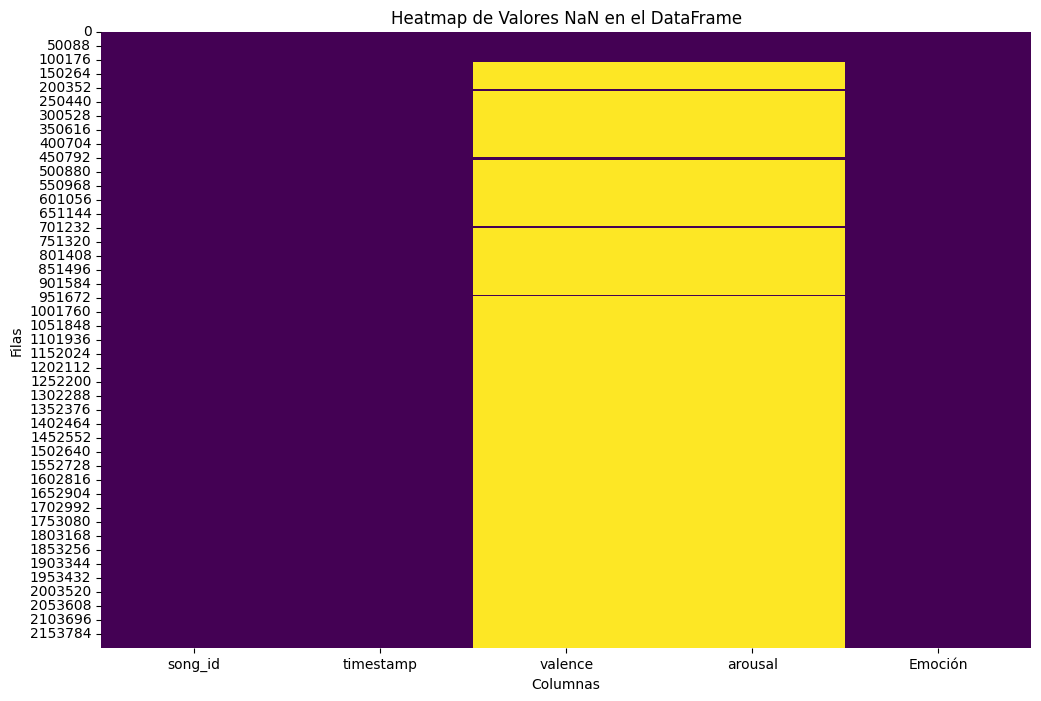

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
# Subconjunto de columnas para visualizar el heatmap
nan_heatmap_df = long_df.isnull()

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(nan_heatmap_df, cbar=False, cmap="viridis")
plt.title("Heatmap de Valores NaN en el DataFrame")
plt.xlabel("Columnas")
plt.ylabel("Filas")
plt.show()


In [13]:
null_counts_by_row = long_df.isnull().sum(axis=1)
null_counts_by_row

0          0
1          0
2          0
3          0
4          0
          ..
2203841    2
2203842    2
2203843    2
2203844    2
2203845    2
Length: 2203846, dtype: int64

In [29]:
long_df_cleaned = long_df.dropna(subset=['valence', 'arousal'], how='any').copy()
long_df_cleaned

,song_id,timestamp,valence,arousal,emotion
0,2,sample_15000ms,-0.073341,-0.109386,calm
1,3,sample_15000ms,-0.189702,-0.110846,calm
2,4,sample_15000ms,0.154286,0.222327,calm
3,5,sample_15000ms,0.149053,-0.255613,calm
4,7,sample_15000ms,0.342816,0.464234,bland
...,...,...,...,...,...
2196590,2011,sample_624000ms,-0.150000,-0.236000,calm
2198392,2011,sample_624500ms,-0.152000,-0.332000,calm
2200194,2011,sample_625000ms,-0.150000,-0.370000,calm
2201996,2011,sample_625500ms,-0.136000,-0.392000,calm


In [30]:
random_rows = long_df_cleaned.sample(n=20)
random_rows

,song_id,timestamp,valence,arousal,emotion
106358,59,sample_44500ms,-0.144731,0.312046,bland
6628,1479,sample_16500ms,0.192000,0.352000,bland
39520,1935,sample_25500ms,0.228000,0.221000,calm
44316,1325,sample_27000ms,0.195000,0.455000,bland
94336,824,sample_41000ms,0.454803,0.555885,bland
75347,1722,sample_35500ms,0.230000,0.049000,calm
63225,187,sample_32500ms,-0.255161,-0.649662,calm
236025,2022,sample_80000ms,-0.250000,0.026000,calm
909977,2026,sample_267000ms,0.174000,-0.088000,calm
54561,650,sample_30000ms,-0.157773,0.372248,bland


In [32]:
filtered_rows = long_df_cleaned[~long_df_cleaned['emotion'].isin(['bland', 'calm'])]
filtered_rows

,song_id,timestamp,valence,arousal,emotion
15218,1059,sample_19000ms,-0.169,0.702,tension
22621,1254,sample_21000ms,0.117,0.701,tension
26225,1254,sample_22000ms,0.114,0.703,tension
29634,1059,sample_23000ms,-0.140,0.701,tension
33433,1254,sample_24000ms,0.117,0.703,tension
...,...,...,...,...,...
1360465,2014,sample_392000ms,-0.724,0.656,melancholy
1362267,2014,sample_392500ms,-0.726,0.654,melancholy
1369475,2014,sample_394500ms,-0.704,0.660,melancholy
1371277,2014,sample_395000ms,-0.708,0.658,melancholy


comprobamos que no detecta casi ninguna empcion distinta de bland o calm. Debe ser porque los datos no se ajustan a los rangos de la funcion.

### 1.3 Mapeo de emociones

In [33]:
# calcular máximos y mínimos
valence_max = long_df['valence'].max()
valence_min = long_df['valence'].min()
arousal_max = long_df['arousal'].max()
arousal_min = long_df['arousal'].min()

print(f"valence - Max: {valence_max}, Min: {valence_min}")
print(f"arousal - Max: {arousal_max}, Min: {arousal_min}")


valence - Max: 0.716, Min: -0.832
arousal - Max: 0.898, Min: -0.772351


In [71]:
def map_emotion(valence, arousal):
    if valence > 0.5 and arousal > 0.5:
        return 'Excitement'
    elif valence > 0.5 and 0.3 <= arousal <= 0.5:
        return 'Joy'
    elif valence > 0.5 and arousal < 0.3:
        return 'Contentment'
    elif 0.0 <= valence <= 0.5 and arousal > 0.5:
        return 'Elation'
    elif 0.0 <= valence <= 0.5 and 0.0 <= arousal <= 0.5:
        return 'Happiness'
    elif 0.0 <= valence <= 0.5 and arousal < 0.0:
        return 'Calmness'
    elif -0.5 <= valence < 0.0 and arousal > 0.5:
        return 'Stress'
    elif -0.5 <= valence < 0.0 and 0.0 <= arousal <= 0.5:
        return 'Satisfaction'
    elif -0.5 <= valence < 0.0 and arousal < 0.0:
        return 'Relaxation'
    elif valence < -0.5 and arousal > 0.5:
        return 'Fear'
    elif valence < -0.5 and 0.3 <= arousal <= 0.5:
        return 'Anxiety'
    elif valence < -0.5 and 0.0 <= arousal < 0.3:
        return 'Sadness'
    elif valence < -0.5 and arousal < 0.0:
        return 'Depression'
    elif arousal < -0.7: # Inactivity threshold
        return 'Sleep'
    else:
        return 'Neutral'


In [35]:
long_df_cleaned

,song_id,timestamp,valence,arousal,emotion
0,2,sample_15000ms,-0.073341,-0.109386,calm
1,3,sample_15000ms,-0.189702,-0.110846,calm
2,4,sample_15000ms,0.154286,0.222327,calm
3,5,sample_15000ms,0.149053,-0.255613,calm
4,7,sample_15000ms,0.342816,0.464234,bland
...,...,...,...,...,...
2196590,2011,sample_624000ms,-0.150000,-0.236000,calm
2198392,2011,sample_624500ms,-0.152000,-0.332000,calm
2200194,2011,sample_625000ms,-0.150000,-0.370000,calm
2201996,2011,sample_625500ms,-0.136000,-0.392000,calm


In [72]:
# aplicar la función ajustada
long_df_cleaned['emotion'] = long_df_cleaned.apply(lambda row: map_emotion(row['valence'], row['arousal']), axis=1)


In [59]:
# verificar los resultados
long_df_cleaned[['valence', 'arousal', 'emotion']]

,valence,arousal,emotion
0,-0.073341,-0.109386,Relaxation
1,-0.189702,-0.110846,Relaxation
2,0.154286,0.222327,Happiness
3,0.149053,-0.255613,Calmness
4,0.342816,0.464234,Happiness
...,...,...,...
2196590,-0.150000,-0.236000,Relaxation
2198392,-0.152000,-0.332000,Relaxation
2200194,-0.150000,-0.370000,Relaxation
2201996,-0.136000,-0.392000,Relaxation


In [60]:
filtered_rows_df = long_df_cleaned[~long_df_cleaned['emotion'].isin(['Relaxation', 'Calmness'])]
filtered_rows_df

,song_id,timestamp,valence,arousal,emotion
2,4,sample_15000ms,0.154286,0.222327,Happiness
4,7,sample_15000ms,0.342816,0.464234,Happiness
7,12,sample_15000ms,0.330863,0.222143,Happiness
9,17,sample_15000ms,0.150160,0.015965,Happiness
11,19,sample_15000ms,0.079942,0.329243,Happiness
...,...,...,...,...,...
1863220,2011,sample_531500ms,0.110000,0.310000,Happiness
1865022,2011,sample_532000ms,0.112000,0.250000,Happiness
1866824,2011,sample_532500ms,0.112000,0.112000,Happiness
1868626,2011,sample_533000ms,0.106000,0.076000,Happiness


In [95]:
long_df_cleaned.to_csv('data/long_df.csv', index=False)

In [61]:
unique_song_ids = long_df_cleaned['song_id'].unique().tolist()
print(unique_song_ids)
len(unique_song_ids)

[2, 3, 4, 5, 7, 8, 10, 12, 13, 17, 18, 19, 20, 21, 22, 24, 25, 31, 32, 35, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 62, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 140, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 250, 

1802

### 1.4 Visualización del mapeo

In [62]:
song_emotions = long_df_cleaned.groupby('song_id')['emotion'].agg(lambda x: x.mode()[0]) # cogemso la moda (la emoción más repetida por cancion de forma úncia)

song_emotions

song_id
2         Relaxation
3         Relaxation
4          Happiness
5           Calmness
7          Happiness
            ...     
2054        Calmness
2055       Happiness
2056       Happiness
2057    Satisfaction
2058    Satisfaction
Name: emotion, Length: 1802, dtype: object

In [63]:
emotion_counts_by_song = song_emotions.value_counts()
emotion_counts_by_song

emotion
Happiness       812
Relaxation      377
Calmness        212
Satisfaction    201
Elation         110
Stress           31
Excitement       29
Joy              22
Depression        5
Contentment       1
Anxiety           1
Fear              1
Name: count, dtype: int64

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns


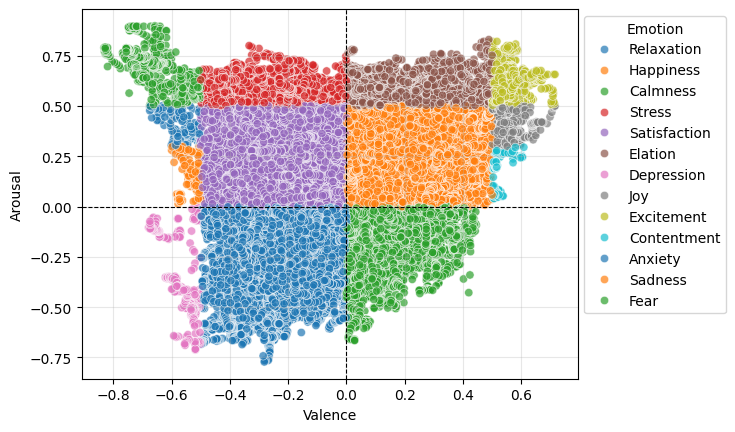

In [73]:
# plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=long_df_cleaned, 
    x='valence', 
    y='arousal', 
    hue='emotion',  # color por emocuin
    palette='tab10', 
    alpha=0.7
)

plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  
plt.legend(title='Emotion', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(alpha=0.3)

plt.show()
